# Library Declaration

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import mean_squared_error
from math import sqrt
import math

# Reading the Dataset

In [2]:
tube_values_df = pd.read_csv('tube_values.csv')
tube_csv_df = pd.read_csv('tube_csv_1.csv')

In [3]:
tube_df = pd.merge(tube_values_df, tube_csv_df, left_on = 'tube_assembly_id', right_on = 'tube_assembly_id',
                    how='left', sort=False)

# Viewing the shape of the dataset

In [4]:
tube_df.shape

(133282, 11)

In [5]:
tube_df.dtypes

tube_assembly_id     object
material_id          object
diameter            float64
wall                float64
length              float64
num_bends             int64
bend_radius         float64
supplier             object
quote_date           object
quantity            float64
cost                float64
dtype: object

In [6]:
tube_df.head

<bound method NDFrame.head of        tube_assembly_id material_id  diameter  wall  length  num_bends  \
0              TA-00001     SP-0035     12.70  1.65   164.0          5   
1              TA-00001     SP-0035     12.70  1.65   164.0          5   
2              TA-00001     SP-0035     12.70  1.65   164.0          5   
3              TA-00001     SP-0035     12.70  1.65   164.0          5   
4              TA-00001     SP-0035     12.70  1.65   164.0          5   
5              TA-00001     SP-0035     12.70  1.65   164.0          5   
6              TA-00001     SP-0035     12.70  1.65   164.0          5   
7              TA-00001     SP-0035     12.70  1.65   164.0          5   
8              TA-00001     SP-0035     12.70  1.65   164.0          5   
9              TA-00001     SP-0035     12.70  1.65   164.0          5   
10             TA-00001     SP-0035     12.70  1.65   164.0          5   
11             TA-00001     SP-0035     12.70  1.65   164.0          5   
12      

In [7]:
tube_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133282 entries, 0 to 133281
Data columns (total 11 columns):
tube_assembly_id    133282 non-null object
material_id         133282 non-null object
diameter            133282 non-null float64
wall                133282 non-null float64
length              133282 non-null float64
num_bends           133282 non-null int64
bend_radius         133282 non-null float64
supplier            120940 non-null object
quote_date          120940 non-null object
quantity            120940 non-null float64
cost                120940 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 12.2+ MB


In [8]:
# Renaming the Required attributes

In [9]:
tube_df.rename(columns={'num_bends':'num_of_bends', 'wall':'thickness', 'supplier' : 'supplier_id'},inplace=True)

In [10]:
tube_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133282 entries, 0 to 133281
Data columns (total 11 columns):
tube_assembly_id    133282 non-null object
material_id         133282 non-null object
diameter            133282 non-null float64
thickness           133282 non-null float64
length              133282 non-null float64
num_of_bends        133282 non-null int64
bend_radius         133282 non-null float64
supplier_id         120940 non-null object
quote_date          120940 non-null object
quantity            120940 non-null float64
cost                120940 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 12.2+ MB


In [11]:
tube_df['cost'].describe()

count    120940.000000
mean         11.953127
std          17.478134
min           1.033103
25%           4.077638
50%           6.794205
75%          13.544820
max         511.357119
Name: cost, dtype: float64

In [12]:
tube_df['length'].describe()

count    133282.000000
mean        100.181394
std          64.023497
min           0.000000
25%          50.000000
50%          88.000000
75%         137.000000
max        1333.000000
Name: length, dtype: float64

In [13]:
tube_df['bend_radius'].describe()

count    133282.000000
mean         44.939153
std         237.947665
min           0.000000
25%          19.050000
50%          31.800000
75%          50.800000
max        9999.000000
Name: bend_radius, dtype: float64

In [14]:
tube_df['thickness'].describe()

count    133282.000000
mean          1.400057
std           0.684755
min           0.710000
25%           0.890000
50%           1.240000
75%           1.650000
max           7.900000
Name: thickness, dtype: float64

In [15]:
tube_df['diameter'].describe()

count    133282.000000
mean         17.887524
std          19.050707
min           3.180000
25%           9.520000
50%          12.700000
75%          19.050000
max         203.200000
Name: diameter, dtype: float64

In [16]:
tube_df['num_of_bends'].describe()

count    133282.000000
mean          3.854204
std           2.210464
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max          17.000000
Name: num_of_bends, dtype: float64

# Visualizing missing values

In [17]:
tube_df.isnull().sum()

tube_assembly_id        0
material_id             0
diameter                0
thickness               0
length                  0
num_of_bends            0
bend_radius             0
supplier_id         12342
quote_date          12342
quantity            12342
cost                12342
dtype: int64

In [18]:
tube_df.dropna(inplace=True)
tube_df.isnull().sum()

tube_assembly_id    0
material_id         0
diameter            0
thickness           0
length              0
num_of_bends        0
bend_radius         0
supplier_id         0
quote_date          0
quantity            0
cost                0
dtype: int64

# Data Visualization

In [19]:
print("CATEGORICAL_FEATURES")
cat_feature=[col for col in tube_df.columns if tube_df[col].dtypes=='O']
print(cat_feature)
print()
print("NUMERICAL_FEATURES")
num_feature=[col for col in tube_df.columns if tube_df[col].dtypes!='O']
print(num_feature)

CATEGORICAL_FEATURES
['tube_assembly_id', 'material_id', 'supplier_id', 'quote_date']

NUMERICAL_FEATURES
['diameter', 'thickness', 'length', 'num_of_bends', 'bend_radius', 'quantity', 'cost']


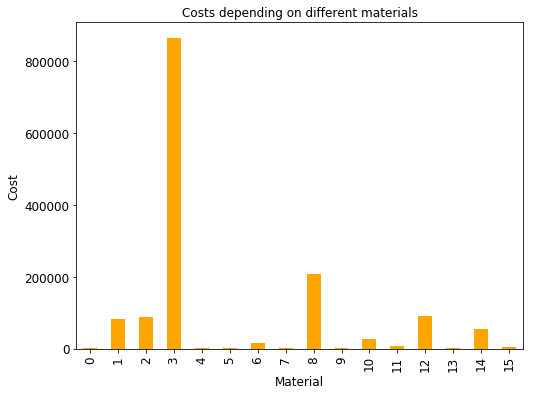

In [20]:
ax = tube_df[['material_id','cost']].groupby(['material_id']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Costs depending on different materials", 
                                       color='orange', fontsize=12)
ax.set_xlabel("Material", fontsize=12)
ax.set_ylabel("Cost", fontsize=12)
plt.show()

Text(0, 0.5, 'Quantity')

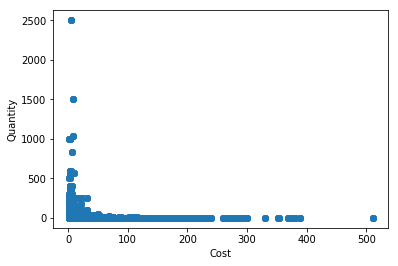

In [21]:
plt.scatter(tube_df.cost,tube_df.quantity)
plt.xlabel('Cost')
plt.ylabel('Quantity')


Text(0, 0.5, 'Count')

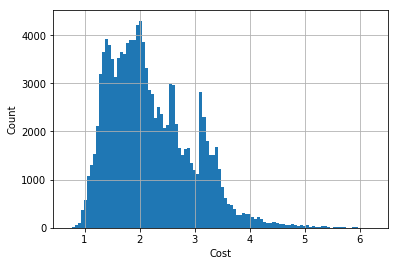

In [22]:
np.log(tube_df['cost'] + 1).hist(bins=100)
plt.xlabel('Cost')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

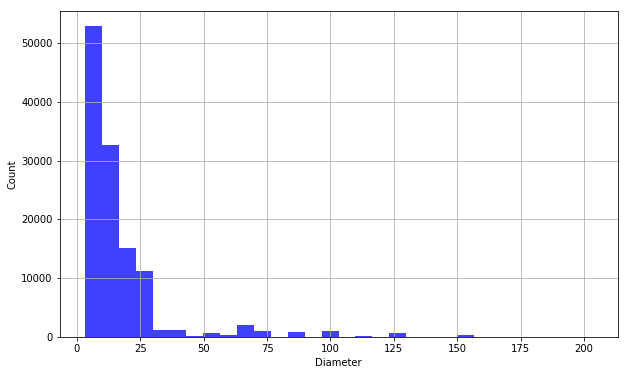

In [23]:
diameter = tube_df['diameter']
diameter.hist(bins = 30, figsize=(10,6), color = 'blue', alpha = 0.75)
plt.xlabel('Diameter')
plt.ylabel('Count')
#Maximun number of diameters of the tube is between 0-30

Text(0, 0.5, 'Count')

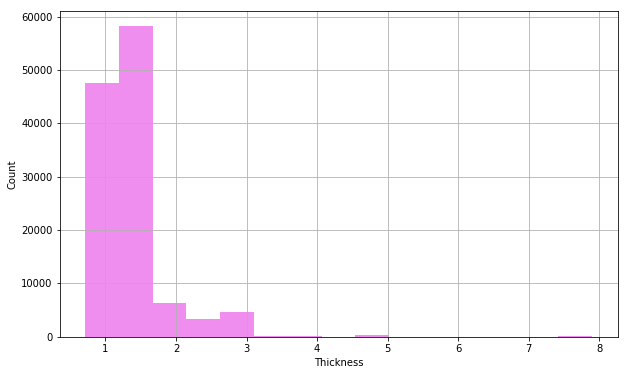

In [24]:
thickness = tube_df['thickness']
thickness.hist(bins = 15, figsize=(10,6), color = 'violet', alpha = 0.90)
plt.xlabel('Thickness')
plt.ylabel('Count')
#Maximun number of thickness values of the tubes are between 0.5-1.8

Text(0, 0.5, 'Count')

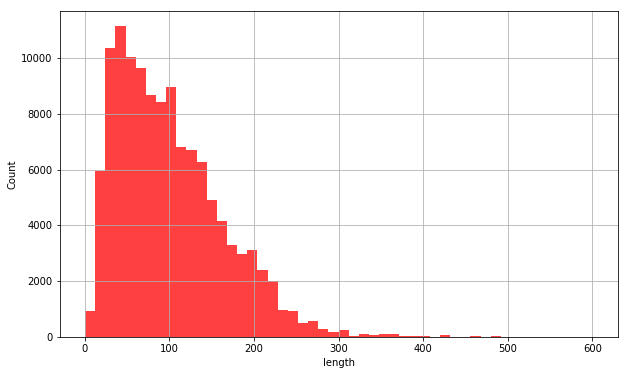

In [25]:
length = tube_df['length']
length.hist(bins = 50, figsize=(10,6), color = 'red', alpha = 0.75)
plt.xlabel('length')
plt.ylabel('Count')
#Here we see that shorter tubes less than 150 are dominant

Text(0, 0.5, 'Count')

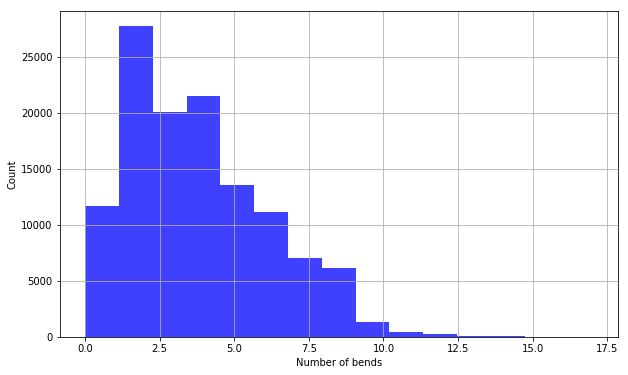

In [26]:
bends = tube_df['num_of_bends']
bends.hist(bins = 15, figsize=(10,6), color = 'blue', alpha = 0.75)
plt.xlabel('Number of bends')
plt.ylabel('Count')
#Tubes with 1.9-5.5 seems to be more dominant

In [27]:
tube_df.corr()

,diameter,thickness,length,num_of_bends,bend_radius,quantity,cost
diameter,1.000000,0.396465,0.032874,-0.239463,0.114526,-0.109509,0.435247
thickness,0.396465,1.000000,0.110839,-0.136167,0.146834,-0.066558,0.362024
length,0.032874,0.110839,1.000000,0.501988,-0.000242,0.005226,0.139821
num_of_bends,-0.239463,-0.136167,0.501988,1.000000,-0.044802,0.018848,-0.080073
bend_radius,0.114526,0.146834,-0.000242,-0.044802,1.000000,-0.018745,0.070833
quantity,-0.109509,-0.066558,0.005226,0.018848,-0.018745,1.000000,-0.224809
cost,0.435247,0.362024,0.139821,-0.080073,0.070833,-0.224809,1.000000


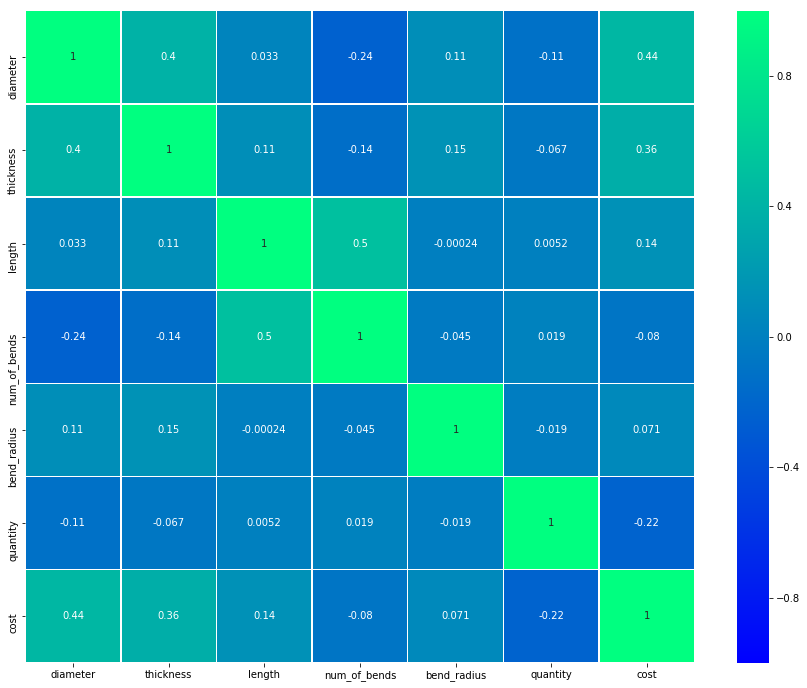

In [28]:
#Now lets make heatmaps and cluster maps of the correlations of the numerical colunms of tube data frame..
corr_df= tube_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_df, vmax = 1, vmin = -1, annot=True,linewidths=.5, cmap = 'winter')

Text(0.5, 1.0, 'Mean(Cost) per Quantity')

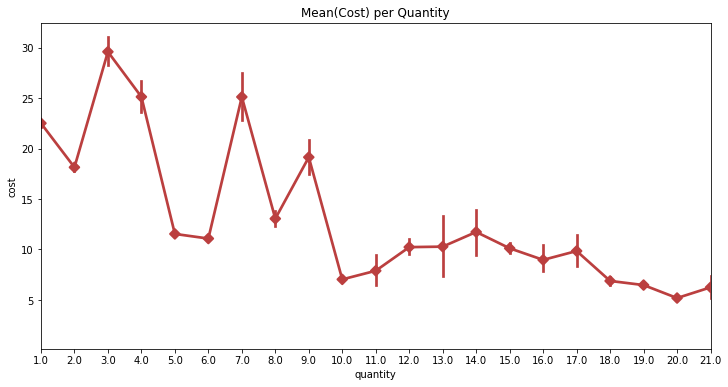

In [29]:
fig= plt.figure(figsize=(12,6))
sns.pointplot(x ='quantity', y = 'cost', data = tube_df,color="#bb3f3f", markers="D")
plt.xlim((0,20))
plt.title('Mean(Cost) per Quantity')

Text(0.5, 1.0, 'Cost per volume quantity')

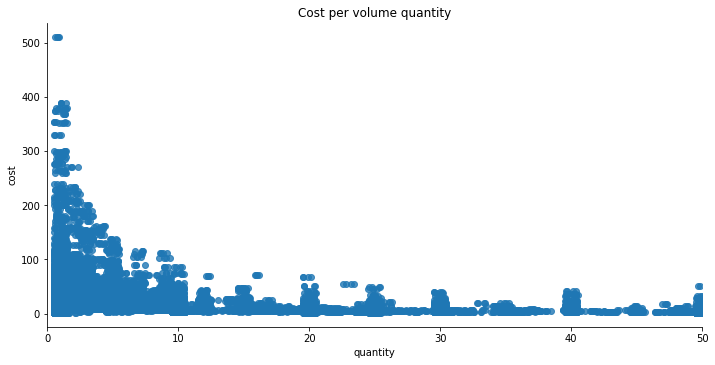

In [30]:
sns.lmplot(x = 'quantity', y = 'cost', data = tube_df, aspect=2, fit_reg=False, markers='o',
          x_jitter=0.5)
plt.xlim((0,50))
plt.title('Cost per volume quantity')
#Most of the quantities are in the range of 1-5
#And as the quanitity is increasing the cost is decreasing.

Text(0.5, 1.0, 'Mean(Cost) per Bend')

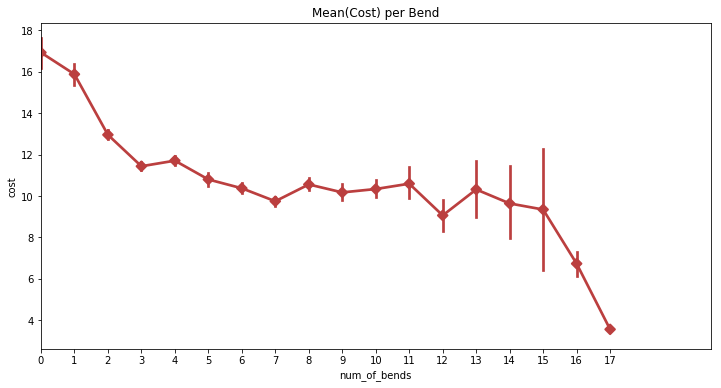

In [31]:
fig= plt.figure(figsize=(12,6))
sns.pointplot(x ='num_of_bends', y = 'cost', data = tube_df,color="#bb3f3f", markers="D")
plt.xlim((0,20))
plt.title('Mean(Cost) per Bend')

# Dropping Columns

In [32]:
tube_df.drop('material_id',axis=1,inplace=True)
tube_df.head()

,tube_assembly_id,diameter,thickness,length,num_of_bends,bend_radius,supplier_id,quote_date,quantity,cost
0,TA-00001,12.7,1.65,164.0,5,38.1,S-0066,23-06-2013,1.0,23.367793
1,TA-00001,12.7,1.65,164.0,5,38.1,S-0066,23-06-2013,2.0,13.193133
2,TA-00001,12.7,1.65,164.0,5,38.1,S-0066,23-06-2013,5.0,7.606482
3,TA-00001,12.7,1.65,164.0,5,38.1,S-0066,23-06-2013,10.0,5.714193
4,TA-00001,12.7,1.65,164.0,5,38.1,S-0066,23-06-2013,25.0,4.301115


In [33]:
tube_df.drop('supplier_id',axis=1,inplace=True)
tube_df.head()

,tube_assembly_id,diameter,thickness,length,num_of_bends,bend_radius,quote_date,quantity,cost
0,TA-00001,12.7,1.65,164.0,5,38.1,23-06-2013,1.0,23.367793
1,TA-00001,12.7,1.65,164.0,5,38.1,23-06-2013,2.0,13.193133
2,TA-00001,12.7,1.65,164.0,5,38.1,23-06-2013,5.0,7.606482
3,TA-00001,12.7,1.65,164.0,5,38.1,23-06-2013,10.0,5.714193
4,TA-00001,12.7,1.65,164.0,5,38.1,23-06-2013,25.0,4.301115


In [34]:
tube_df.drop('quote_date',axis=1,inplace=True)
tube_df.head()

,tube_assembly_id,diameter,thickness,length,num_of_bends,bend_radius,quantity,cost
0,TA-00001,12.7,1.65,164.0,5,38.1,1.0,23.367793
1,TA-00001,12.7,1.65,164.0,5,38.1,2.0,13.193133
2,TA-00001,12.7,1.65,164.0,5,38.1,5.0,7.606482
3,TA-00001,12.7,1.65,164.0,5,38.1,10.0,5.714193
4,TA-00001,12.7,1.65,164.0,5,38.1,25.0,4.301115


In [35]:
tube_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120940 entries, 0 to 133281
Data columns (total 8 columns):
tube_assembly_id    120940 non-null object
diameter            120940 non-null float64
thickness           120940 non-null float64
length              120940 non-null float64
num_of_bends        120940 non-null int64
bend_radius         120940 non-null float64
quantity            120940 non-null float64
cost                120940 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.3+ MB


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()    
tube_df['tube_assembly_id'] = le.fit_transform(tube_df['tube_assembly_id'])


In [37]:
tube_df['cost'] = tube_df['cost'].astype(int)
tube_df['quantity'] = tube_df['quantity'].astype(int)
tube_df.head()

,tube_assembly_id,diameter,thickness,length,num_of_bends,bend_radius,quantity,cost
0,0,12.7,1.65,164.0,5,38.1,1,23
1,0,12.7,1.65,164.0,5,38.1,2,13
2,0,12.7,1.65,164.0,5,38.1,5,7
3,0,12.7,1.65,164.0,5,38.1,10,5
4,0,12.7,1.65,164.0,5,38.1,25,4


In [38]:
tube_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120940 entries, 0 to 133281
Data columns (total 8 columns):
tube_assembly_id    120940 non-null int32
diameter            120940 non-null float64
thickness           120940 non-null float64
length              120940 non-null float64
num_of_bends        120940 non-null int64
bend_radius         120940 non-null float64
quantity            120940 non-null int32
cost                120940 non-null int32
dtypes: float64(4), int32(3), int64(1)
memory usage: 11.9 MB


In [39]:
x = tube_df.iloc[:,0:-1] 
y = tube_df.iloc[:,-1]

In [40]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [41]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [42]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [43]:
import pickle
pickle.dump(sc_x, open("scalerX", "wb"))

In [44]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Linear Regression Model

In [45]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_tr = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

In [46]:
print("Testing")
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred_lr)))
mae=metrics.mean_absolute_error(y_test,y_pred_lr)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred_lr,y_test))

Testing
Root Mean squared error : 15.72
Mean absolute error : 7.86
RMSLE : 0.73 


In [47]:
print("Training")
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_train, y_pred_tr)))
mae=metrics.mean_absolute_error(y_train,y_pred_tr)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred_tr,y_train))

Training
Root Mean squared error : 14.67
Mean absolute error : 7.67
RMSLE : 0.74 


# Polynomial Features Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(2)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.fit_transform(X_test)

In [49]:
from sklearn import linear_model
lr_model= linear_model.LinearRegression()
lr_model.fit(X_train_poly, y_train)
y_tr_py = lr_model.predict(X_train_poly)
y_pred_pr = lr_model.predict(X_test_poly)

In [50]:
print("Testing")
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred_pr)))
mae=metrics.mean_absolute_error(y_test,y_pred_pr)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred_pr,y_test))

Testing
Root Mean squared error : 14.80
Mean absolute error : 7.40
RMSLE : 0.78 


In [51]:
print("Training")
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_train, y_tr_py)))
mae=metrics.mean_absolute_error(y_train,y_tr_py)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_tr_py,y_train))

Training
Root Mean squared error : 13.86
Mean absolute error : 7.25
RMSLE : 0.77 


# RandomForest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 11, max_features ='auto') 

rf.fit(X_train,y_train)
y_tr_rf = rf.predict(X_train)
y_pred_rfc = rf.predict(X_test) 

In [53]:
print("Testing")
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_test, y_pred_rfc)))
mae=metrics.mean_absolute_error(y_test,y_pred_rfc)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred_rfc,y_test))

Testing
Root Mean squared error : 1.78
Mean absolute error : 0.11
RMSLE : 0.08 


In [54]:
print("Training")
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_train, y_tr_rf)))
mae=metrics.mean_absolute_error(y_train,y_tr_rf)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_tr_rf,y_train))

Training
Root Mean squared error : 1.48
Mean absolute error : 0.05
RMSLE : 0.05 


# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(min_samples_split=2,max_leaf_nodes=10)


In [56]:
dtr.fit(X_train,y_train)
y_tr_dt = dtr.predict(X_train)
y_pred_dtr=dtr.predict(X_test)

In [57]:
print("Testing")
print("Root Mean squared error : %.2f" 
     % sqrt(mean_squared_error(y_test, y_pred_dtr)))
mae=metrics.mean_absolute_error(y_test,y_pred_dtr)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred_dtr,y_test))

Testing
Root Mean squared error : 16.96
Mean absolute error : 5.70
RMSLE : 0.61 


In [58]:
print("Training")
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_train, y_tr_dt)))
mae=metrics.mean_absolute_error(y_train,y_tr_dt)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_tr_dt,y_train))

Training
Root Mean squared error : 15.86
Mean absolute error : 5.56
RMSLE : 0.60 


# KNN(K-Nearest Neighbors)

In [59]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_tr_knn = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)

In [60]:
print("Testing")
print("Root Mean squared error : %.2f" 
     % sqrt(mean_squared_error(y_test, y_pred_knn)))
mae=metrics.mean_absolute_error(y_test,y_pred_knn)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_pred_knn,y_test))

Testing
Root Mean squared error : 4.91
Mean absolute error : 0.73
RMSLE : 0.19 


In [61]:
print("Training")
print("Root Mean squared error : %.2f" 
      % sqrt(mean_squared_error(y_train, y_tr_knn)))
mae=metrics.mean_absolute_error(y_train,y_tr_knn)
print("Mean absolute error : %.2f"%mae)
print("RMSLE : %.2f "%rmsle(y_tr_knn,y_train))

Training
Root Mean squared error : 2.08
Mean absolute error : 0.11
RMSLE : 0.07 


# Comparing The models

In [62]:
print("RandomForest          : %.2f "%rmsle(y_pred_rfc,y_test))
print("Decision Tree         : %.2f "%rmsle(y_pred_dtr,y_test))
print("Polynomial Regression : %.2f "%rmsle(y_pred_pr,y_test))
print("Linear Regression     : %.2f "%rmsle(y_pred_lr,y_test))
print("KNN                   : %.2f "%rmsle(y_pred_knn,y_test))

RandomForest          : 0.08 
Decision Tree         : 0.61 
Polynomial Regression : 0.78 
Linear Regression     : 0.73 
KNN                   : 0.19 


# Saving the Model

In [63]:
import joblib
filename = 'model.sav'
joblib.dump(rf, filename)

['model.sav']